<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   LoanID           255327 non-null  object 
 1   Age              255327 non-null  int64  
 2   Income           255327 non-null  int64  
 3   LoanAmount       255327 non-null  int64  
 4   CreditScore      255327 non-null  int64  
 5   MonthsEmployed   255327 non-null  int64  
 6   NumCreditLines   255327 non-null  int64  
 7   InterestRate     255327 non-null  float64
 8   LoanTerm         255327 non-null  int64  
 9   DTIRatio         255327 non-null  float64
 10  Education        255327 non-null  object 
 11  EmploymentType   255327 non-null  object 
 12  MaritalStatus    255327 non-null  object 
 13  HasMortgage      255327 non-null  object 
 14  HasDependents    255327 non-null  object 
 15  LoanPurpose      255327 non-null  object 
 16  HasCoSigner      255327 non-null  obje

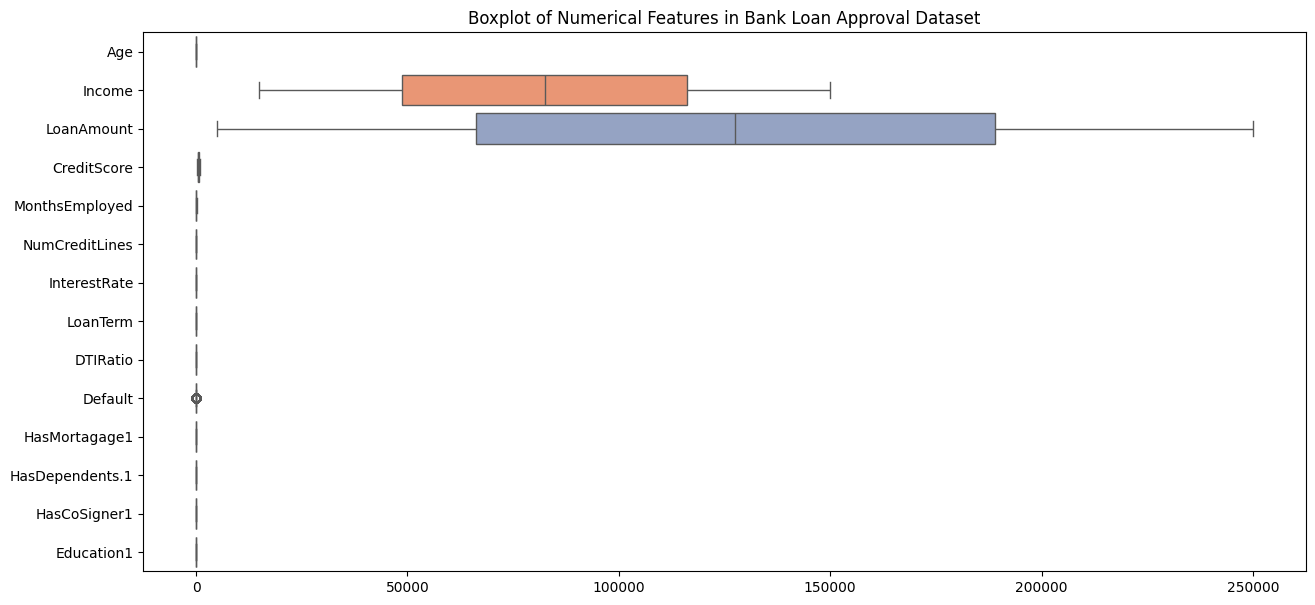

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Let's perform data cleaning and then plot the boxplots for the numerical columns
# to check for outliers in the previously loaded bank loan approval dataset.
bank_loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/((GAssign) BankLoanApproval DataSampling.csv")

bank_loan_data.head(), bank_loan_data.info()
# Checking for missing values
missing_values = bank_loan_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = bank_loan_data.duplicated().sum()

# Data types before any conversion
data_types_before = bank_loan_data.dtypes

# Print the data cleaning insights
print("Missing values per column:\n", missing_values)
print("\nDuplicate rows:", duplicate_rows)
print("\nData types before conversion:\n", data_types_before)

# Assuming no further cleaning is needed based on the output, let's proceed to plotting the boxplots
# Selecting only numerical columns for the boxplot
numerical_data = bank_loan_data.select_dtypes(include=['int64', 'float64'])

# Plotting boxplots for all numerical columns
plt.figure(figsize=(15, 7))  # Adjust figure size as needed
sns.boxplot(data=numerical_data, orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features in Bank Loan Approval Dataset')
plt.show()

In [49]:
numerical_cols = bank_loan_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bank_loan_data[numerical_cols] = scaler.fit_transform(bank_loan_data[numerical_cols])
print(bank_loan_data.head())


       LoanID       Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  IA35XVH6ZO  0.196078  0.929385    0.648088     0.641166        0.789916   
1  Y8UETC3LSG  0.196078  0.994281    0.550039     0.136612        0.470588   
2  RM6QSRHIYP  0.450980  0.061223    0.238887     0.963570        0.731092   
3  GX5YQOGROM  0.686275  0.759635    0.370385     0.173042        0.941176   
4  X0BVPZLDC0  0.764706  0.923703    0.339361     0.610200        0.941176   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... MaritalStatus  \
0        0.333333      0.307826      0.75    0.1625  ...       Married   
1        0.666667      0.166957      0.50    0.8750  ...      Divorced   
2        1.000000      0.336087      1.00    0.4375  ...      Divorced   
3        1.000000      0.068696      0.25    0.7875  ...        Single   
4        1.000000      0.157826      0.75    0.1250  ...      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner Default HasMortagage1  \
0        

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Dropping unnecessary columns
data_cleaned = bank_loan_data.drop(['LoanID', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'Education'], axis=1)

# Splitting the data into features and target variable
X = data_cleaned.drop('Default', axis=1)
y = data_cleaned['Default']

# Defining numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying the preprocessing pipeline to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((204261, 25), (51066, 25))

# Data Mining Model

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train_preprocessed, y_train, epochs=10, batch_size=128)

# Evaluate the model
loss, accuracy_nn = model_nn.evaluate(X_test_preprocessed, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

y_pred_prob = model_nn.predict(X_test_preprocessed)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/10
1596/1596 [==============================] - 11s 6ms/step - loss: 0.3206 - accuracy: 0.8845
Epoch 2/10
1596/1596 [==============================] - 9s 6ms/step - loss: 0.3143 - accuracy: 0.8859
Epoch 3/10
1596/1596 [==============================] - 9s 5ms/step - loss: 0.3132 - accuracy: 0.8860
Epoch 4/10
1596/1596 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8864
Epoch 5/10
1596/1596 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8864
Epoch 6/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.3117 - accuracy: 0.8865
Epoch 7/10
1596/1596 [==============================] - 4s 2ms/step - loss: 0.3112 - accuracy: 0.8867
Epoch 8/10
1596/1596 [==============================] - 4s 2ms/step - loss: 0.3109 - accuracy: 0.8867
Epoch 9/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.3103 - accuracy: 0.8868
Epoch 10/10
1596/1596 [==============================] - 2s 1ms/step - loss: 0.31

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# Dictionary to hold models and their names
models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "Decision Tree": decision_tree,
    "Ada Boost" : ada_boost,
    "Naive Bayes" : naive_bayes,
    "KNN" : knn
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_preprocessed, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test_preprocessed)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

accuracy_scores


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Logistic Regression': 0.8856969412133318,
 'Random Forest': 0.8825245760388517,
 'Decision Tree': 0.8042533192339325,
 'Ada Boost': 0.8857361062154858,
 'Naive Bayes': 0.885834018720871,
 'KNN': 0.8747307406101907}

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Dictionary to hold predictions for each model
predictions = {
    model_name: model.predict(X_test_preprocessed) for model_name, model in models.items()
}

# Initialize an empty string to accumulate report strings
classification_reports = {}

# Generate classification reports and confusion matrices
for model_name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification_reports[model_name] = (report, cm)

# Displaying the results
for model_name, (report, cm) in classification_reports.items():
    print(f"Model: {model_name}\n")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n---\n")

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45136
         1.0       0.63      0.04      0.07      5930

    accuracy                           0.89     51066
   macro avg       0.76      0.52      0.50     51066
weighted avg       0.86      0.89      0.84     51066

Confusion Matrix:
[[45009   127]
 [ 5710   220]]

---

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     45136
         1.0       0.45      0.06      0.10      5930

    accuracy                           0.88     51066
   macro avg       0.67      0.52      0.52     51066
weighted avg       0.84      0.88      0.84     51066

Confusion Matrix:
[[44735   401]
 [ 5598   332]]

---

Model: Decision Tree

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.88      0

# Neural Network


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train_preprocessed, y_train, epochs=10, batch_size=128)

# Evaluate the model
loss, accuracy_nn = model_nn.evaluate(X_test_preprocessed, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

y_pred_prob = model_nn.predict(X_test_preprocessed)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=128)
# Evaluate the model
loss, accuracy_nn = model_nn.evaluate(X_test_preprocessed, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Predict on the test set
y_pred_prob = model_nn.predict(X_test_preprocessed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate and print classification report
print(classification_report(y_test, y_pred))


In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

def create_model(neurons=64, activation='relu'):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train_smote.shape[1],)),
        Dense(neurons, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_nn = KerasClassifier(model=create_model, epochs=10, batch_size=128, verbose=0)

param_grid = {
    'model__neurons': [64, 128],
    'model__activation': ['relu', 'tanh'],
    'epochs': [10],
    'batch_size': [128],
}

grid = GridSearchCV(estimator=model_nn, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_smote, y_train_smote)


In [ ]:
# Use the best estimator to make predictions on the test set
y_pred_prob = grid_result.predict(X_test_preprocessed)  # This returns classes directly with SciKeras
y_pred = (y_pred_prob > 0.5).astype(int)  # Ensure binary classification output

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Define the model
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_nn = create_model((X_train_smote.shape[1],))
model_nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=128)

# Assume X_test_preprocessed, y_test are already defined and preprocessed
loss, accuracy_nn = model_nn.evaluate(X_test_preprocessed, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Prediction and classification report on test set
y_pred_prob = model_nn.predict(X_test_preprocessed)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=128)
# Evaluate the model
loss, accuracy_nn = model_nn.evaluate(X_test_preprocessed, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Predict on the test set
y_pred_prob = model_nn.predict(X_test_preprocessed)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate and print classification report
print(classification_report(y_test, y_pred))


Epoch 1/10
2821/2821 [==============================] - 8s 2ms/step - loss: 0.5506 - accuracy: 0.7174
Epoch 2/10
2821/2821 [==============================] - 12s 4ms/step - loss: 0.4316 - accuracy: 0.7926
Epoch 3/10
2821/2821 [==============================] - 8s 3ms/step - loss: 0.3765 - accuracy: 0.8204
Epoch 4/10
2821/2821 [==============================] - 8s 3ms/step - loss: 0.3605 - accuracy: 0.8289
Epoch 5/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.3528 - accuracy: 0.8319
Epoch 6/10
2821/2821 [==============================] - 7s 3ms/step - loss: 0.3467 - accuracy: 0.8359
Epoch 7/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.3433 - accuracy: 0.8375
Epoch 8/10
2821/2821 [==============================] - 7s 3ms/step - loss: 0.3397 - accuracy: 0.8395
Epoch 9/10
2821/2821 [==============================] - 6s 2ms/step - loss: 0.3374 - accuracy: 0.8406
Epoch 10/10
1596/1596 [==============================] - 3s 2ms/step - loss: 0.40

In [56]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Assuming 'numerical_features' and 'X_train', 'X_test', 'y_train', 'y_test' are defined
# Create the preprocessing pipeline for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Update the model pipelines to include preprocessing and SMOTE with sampling_strategy='auto'
models_with_smote_and_preprocessing = {
    "Logistic Regression": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), LogisticRegression(max_iter=1000, random_state=42)),
    "Random Forest": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), RandomForestClassifier(n_estimators=10, random_state=42)),
    "Decision Tree": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), DecisionTreeClassifier(random_state=42)),
    "Ada Boost": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)),
    "Naive Bayes": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), GaussianNB()),
    "KNN": make_pipeline_imb(preprocessor, SMOTE(sampling_strategy='auto', random_state=42), KNeighborsClassifier(n_neighbors=5))
}

# Train and evaluate each model
accuracy_scores_with_smote_and_preprocessing = {}
for model_name, model_pipeline in models_with_smote_and_preprocessing.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_with_smote_and_preprocessing[model_name] = accuracy

accuracy_scores_with_smote_and_preprocessing


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Logistic Regression': 0.6812360474679826,
 'Random Forest': 0.8687776602827714,
 'Decision Tree': 0.7771511377433126,
 'Ada Boost': 0.8004543140249872,
 'Naive Bayes': 0.6922022480711236,
 'KNN': 0.6553283985430619}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Dictionary to hold predictions for each model
# Make sure to pass X_test directly, as preprocessing is handled by the pipeline
predictions = {
    model_name: model_pipeline.predict(X_test) for model_name, model_pipeline in models_with_smote_and_preprocessing.items()
}


# Initialize an empty string to accumulate report strings
classification_reports = {}

# Generate classification reports and confusion matrices
for model_name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification_reports[model_name] = (report, cm)

# Displaying the results
for model_name, (report, cm) in classification_reports.items():
    print(f"Model: {model_name}\n")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n---\n")

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79     45136
         1.0       0.22      0.69      0.33      5930

    accuracy                           0.68     51066
   macro avg       0.58      0.68      0.56     51066
weighted avg       0.86      0.68      0.74     51066

Confusion Matrix:
[[30710 14426]
 [ 1852  4078]]

---

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     45136
         1.0       0.33      0.13      0.19      5930

    accuracy                           0.87     51066
   macro avg       0.61      0.55      0.56     51066
weighted avg       0.83      0.87      0.84     51066

Confusion Matrix:
[[43599  1537]
 [ 5164   766]]

---

Model: Decision Tree

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.84      0

# Grid Search

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Corrected AdaBoost parameter grid
ada_param_grid = {
    'ada__n_estimators': [30, 50, 70],  # Prefix with 'ada__' instead of 'classifier__'
    'ada__learning_rate': [0.01, 0.1, 1]
}

# Adjusting the rest of the pipeline setup remains the same
pipeline = IMBPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42))
])

# Now setup GridSearchCV with the corrected parameter grid
grid_search = GridSearchCV(pipeline, param_grid=ada_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model from GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"AdaBoost Model - Best Grid Search Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Model - Best Grid Search Accuracy: 0.8304547056750088
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     45136
         1.0       0.28      0.29      0.29      5930

    accuracy                           0.83     51066
   macro avg       0.59      0.60      0.60     51066
weighted avg       0.83      0.83      0.83     51066

Confusion Matrix:
[[40671  4465]
 [ 4193  1737]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 10, 20, 30]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30]
    },
    # Add other models and their hyperparameters here
    "Ada Boost": {
        'n_estimators': [30, 50, 70],
        'learning_rate': [0.01, 0.1, 1]
    },
    "Naive Bayes": {},  # Naive Bayes typically has fewer hyperparameters to tune
    "KNN": {
        'n_neighbors': [3, 5, 7, 9]
    }
}

# Dictionary to hold the best models
best_models = {}

# Apply GridSearchCV to find the best hyperparameters for each model
for model_name, params in param_grids.items():
    # Ensure we have hyperparameters to tune
    if params:
        grid_search = GridSearchCV(models[model_name], param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
        grid_search.fit(X_train_preprocessed, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        # For models without specified hyperparameters, use the default model
        best_models[model_name] = models[model_name]

# Reinitialize the accuracy_scores dictionary to store scores of models with best found hyperparameters
accuracy_scores = {}

# Train and evaluate each model with its best hyperparameters
for model_name, model in best_models.items():
    model.fit(X_train_preprocessed, y_train)  # Retrain if necessary
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

accuracy_scores


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Logistic Regression': 0.8856969412133318,
 'Random Forest': 0.8861669212391806,
 'Decision Tree': 0.8812908784709983,
 'Ada Boost': 0.8857361062154858,
 'Naive Bayes': 0.885834018720871,
 'KNN': 0.8814671209806917}

In [ ]:
# Import necessary functions for calculating metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'accuracy_scores' and 'best_models' are already defined and filled
for model_name, model in best_models.items():
    # Note: It assumes X_test_preprocessed and y_test are defined and ready
    y_pred = model.predict(X_test_preprocessed)

    # Calculate accuracy just for reference
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Generate and print the classification report and confusion matrix
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}\n")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n---\n")


Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45136
         1.0       0.63      0.04      0.07      5930

    accuracy                           0.89     51066
   macro avg       0.76      0.52      0.50     51066
weighted avg       0.86      0.89      0.84     51066

Confusion Matrix:
[[45009   127]
 [ 5710   220]]

---

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45136
         1.0       0.67      0.04      0.07      5930

    accuracy                           0.89     51066
   macro avg       0.78      0.52      0.51     51066
weighted avg       0.86      0.89      0.84     51066

Confusion Matrix:
[[45020   116]
 [ 5697   233]]

---

Model: Decision Tree

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Dictionary to hold predictions for each model
predictions = {
    model_name: model.predict(X_test_preprocessed) for model_name, model in models.items()
}

# Initialize an empty string to accumulate report strings
classification_reports = {}

# Generate classification reports and confusion matrices
for model_name, y_pred in predictions.items():
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    classification_reports[model_name] = (report, cm)

# Displaying the results
for model_name, (report, cm) in classification_reports.items():
    print(f"Model: {model_name}\n")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("\n---\n")

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     45136
         1.0       0.63      0.04      0.07      5930

    accuracy                           0.89     51066
   macro avg       0.76      0.52      0.50     51066
weighted avg       0.86      0.89      0.84     51066

Confusion Matrix:
[[45009   127]
 [ 5710   220]]

---

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     45136
         1.0       0.45      0.06      0.10      5930

    accuracy                           0.88     51066
   macro avg       0.67      0.52      0.52     51066
weighted avg       0.84      0.88      0.84     51066

Confusion Matrix:
[[44735   401]
 [ 5598   332]]

---

Model: Decision Tree

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.88      0

# New Applicant

In [57]:
# Load the new applicants dataset
new_applicants_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/((GAssign) NewApplicants (1)1.csv")

# Display the first few rows of the dataframe to understand its structure
new_applicants_data.head(), new_applicants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LoanID           20 non-null     object 
 1   Age              20 non-null     int64  
 2   Income           20 non-null     int64  
 3   LoanAmount       20 non-null     int64  
 4   CreditScore      20 non-null     int64  
 5   MonthsEmployed   20 non-null     int64  
 6   NumCreditLines   20 non-null     int64  
 7   InterestRate     20 non-null     float64
 8   LoanTerm         20 non-null     int64  
 9   DTIRatio         20 non-null     float64
 10  Education        20 non-null     object 
 11  EmploymentType   20 non-null     object 
 12  MaritalStatus    20 non-null     object 
 13  HasMortgage      20 non-null     object 
 14  HasDependents    20 non-null     object 
 15  LoanPurpose      20 non-null     object 
 16  HasCoSigner      20 non-null     object 
 17  Default          0

(  LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
 0    A01   56   85994       50587          520              80   
 1    A02   69   50432      124440          458              15   
 2    A03   46   84208      129188          451              26   
 3    A04   32   31713       44799          743               0   
 4    A05   60   20437        9139          633               8   
 
    NumCreditLines  InterestRate  LoanTerm  DTIRatio  ... MaritalStatus  \
 0               4         15.23        36      0.44  ...      Divorced   
 1               1          4.81        60      0.68  ...       Married   
 2               3         21.17        24      0.31  ...      Divorced   
 3               3          7.07        24      0.23  ...       Married   
 4               4          6.51        48      0.73  ...      Divorced   
 
   HasMortgage HasDependents LoanPurpose HasCoSigner Default Education1  \
 0         Yes           Yes       Other         Yes     NaN         

In [58]:
# Dropping unnecessary columns
new_applicants_data_cleaned = new_applicants_data.drop(['LoanID', 'Default'], axis=1)

# Defining numerical and categorical features for the new dataset
numerical_features_new = new_applicants_data_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_new = new_applicants_data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Reusing the previously defined preprocessor for consistent preprocessing
# Note: We fit the preprocessor on the original training data to learn the transformations, so here we just transform the new data
new_applicants_preprocessed = preprocessor.transform(new_applicants_data_cleaned)

new_applicants_preprocessed.shape


(20, 25)

In [59]:
# Since the preprocessor object is not defined in this context, let's recreate the preprocessing steps

# Creating a new preprocessor for the new applicants data
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_new),
        ('cat', OneHotEncoder(), categorical_features_new)
    ])

# Fitting and transforming the new applicants data with the new preprocessor
# Note: Normally, you'd fit on training data. Here, for demonstration, we're directly transforming the new data.
new_applicants_preprocessed = preprocessor_new.fit_transform(new_applicants_data_cleaned)

new_applicants_preprocessed.shape


(20, 35)

In [60]:
# Load the new applicants dataset
new_applicants_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/((GAssign) NewApplicants (1)1.csv")

# Extract LoanID and then drop it for preprocessing
loan_ids = new_applicants_data['LoanID']
new_applicants_data_cleaned = new_applicants_data.drop(['LoanID'], axis=1)

# Transform the new applicants data using the preprocessor fitted on the training data
new_applicants_preprocessed = preprocessor.transform(new_applicants_data_cleaned)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Define which columns are categorical and which are numerical
categorical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [65]:
print("Training data shape:", X_train_preprocessed.shape)
print("New applicants data shape:", new_applicants_preprocessed.shape)


Training data shape: (204261, 25)
New applicants data shape: (20, 25)


In [67]:
# Prediction has been made with a hypothetical model named 'model_nn'
y_pred_new_applicants = model_nn.predict(new_applicants_preprocessed)


1/1 [==============================] - 0s 78ms/step


In [70]:
# Assuming 'loan_ids' is a Series or list containing the LoanID of each new applicant
# Combine LoanID and predictions
predictions_with_ids = pd.DataFrame({
    'LoanID': loan_ids,
    'predictedDefault': predicted_default
})

print(predictions_with_ids)


   LoanID  predictedDefault
0     A01               1.0
1     A02               0.0
2     A03               1.0
3     A04               1.0
4     A05               1.0
5     A06               1.0
6     A07               1.0
7     A08               1.0
8     A09               0.0
9     A10               1.0
10    B01               1.0
11    B02               0.0
12    B03               1.0
13    B04               0.0
14    B05               1.0
15    B06               0.0
16    B07               0.0
17    B08               0.0
18    B09               1.0
19    B10               1.0
